In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the first and second derivatives using finite differences
def first_derivative(f, x, delta):
    return (f(x + delta) - f(x - delta)) / (2 * delta)

def second_derivative(f, x, delta):
    return (f(x + delta) - 2 * f(x) + f(x - delta)) / (delta**2)

def quasi_newton(f, initial_guess, epsilon, max_iterations=10, delta=0.01):
    x_i = initial_guess
    delta_x = delta
    iteration = 0
    x_values = []  # List to store x values
    f_values = []  # List to store f(x) values
    
    while True:
        x_i_plus = x_i - delta_x * (f(x_i + delta_x) - f(x_i - delta_x)) / \
                        (2 * (f(x_i + delta_x) - 2 * f(x_i) + f(x_i - delta_x)))
        
        f_plus = f(x_i + delta_x) 
        f_minus = f(x_i - delta_x)  
        f_current = f(x_i)
        
        f_prime_x_i = abs(f_plus - f_minus) / abs(2 * delta_x)
        
        x_values.append(x_i)
        f_values.append(f_current)
        
        if iteration > 0:
            print("Iteration {}: x{} = {:.4f}, f(x{}) = {:.4f}, f(x{}+) = {:.4f}, f(x{}-) = {:.4f}, f_prime(x{}) = {:.4f}".format(iteration + 1, 
                                                                                                                    iteration + 1, x_i, 
                                                                                                                    iteration + 1, f_current, 
                                                                                                                    iteration + 1, f_plus, 
                                                                                                                    iteration + 1, f_minus, 
                                                                                                                    iteration + 1, f_prime_x_i))
        else:
            print("Iteration {}: x{} = {:.4f}, f(x{}) = {:.4f}, f(x{}+) = {:.4f}, f(x{}-) = {:.4f}, f_prime(x{}) = --".format(iteration + 1, 
                                                                                                                    iteration + 1, x_i, 
                                                                                                                    iteration + 1, f_current, 
                                                                                                                    iteration + 1, f_plus, 
                                                                                                                    iteration + 1, f_minus, 
                                                                                                                    iteration + 1))
        
        if abs(f_plus - f_minus) / abs(2 * delta_x) <= epsilon or iteration >= max_iterations:
            break
        
        x_i = x_i_plus
        iteration += 1
    
    return x_values, f_values

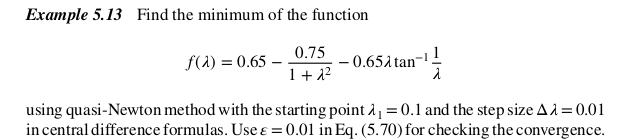

Iteration 1: x1 = 0.1000, f(x1) = -0.1882, f(x1+) = -0.1955, f(x1-) = -0.1806, f_prime(x1) = --
Iteration 2: x2 = 0.3773, f(x2) = -0.3033, f(x2+) = -0.3046, f(x2-) = -0.3018, f_prime(x2) = 0.1383
Iteration 3: x3 = 0.4652, f(x3) = -0.3099, f(x3+) = -0.3100, f(x3-) = -0.3096, f_prime(x3) = 0.0179
Iteration 4: x4 = 0.4805, f(x4) = -0.3100, f(x4+) = -0.3100, f(x4-) = -0.3100, f_prime(x4) = 0.0005

Optimal solution found at x = 0.48047, f(x) = -0.31002


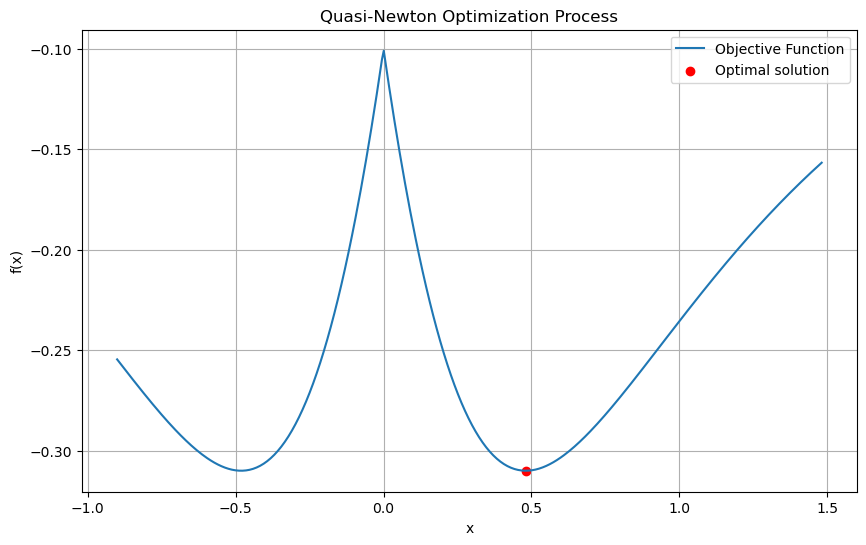

In [7]:
# Define the objective function
def f(x):
    return 0.65 - (0.75 / (1 + x**2)) - (0.65 * x * np.arctan(1/x))

# Perform Quasi-Newton optimization
initial_guess = 0.1
epsilon = 0.01
x_values, f_values = quasi_newton(f, initial_guess, epsilon)

# Print the optimal solution
print("\nOptimal solution found at x = {:.5f}, f(x) = {:.5f}".format(x_values[-1], f_values[-1]))

# Generate x values for the plot
x = np.linspace(min(x_values) - 1, max(x_values) + 1, 400)
y = f(x)

# Find the optimal solution
optimal_solution_x = 0.48047
optimal_solution_y = f(optimal_solution_x)

# Plot the optimization process
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function')
plt.scatter(optimal_solution_x, optimal_solution_y, color='red', label='Optimal solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quasi-Newton Optimization Process')
plt.legend()
plt.grid(True)
plt.show()

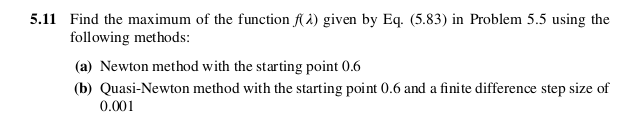
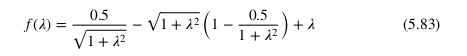

Iteration 1: x1 = 0.6000, f(x1) = 0.2913, f(x1+) = 0.2923, f(x1-) = 0.2902, f_prime(x1) = --
Iteration 2: x2 = 0.7410, f(x2) = 0.2998, f(x2+) = 0.3000, f(x2-) = 0.2996, f_prime(x2) = 0.0203
Iteration 3: x3 = 0.7829, f(x3) = 0.3003, f(x3+) = 0.3003, f(x3-) = 0.3002, f_prime(x3) = 0.0014

Optimal solution found at x = 0.78286, f(x) = 0.30028


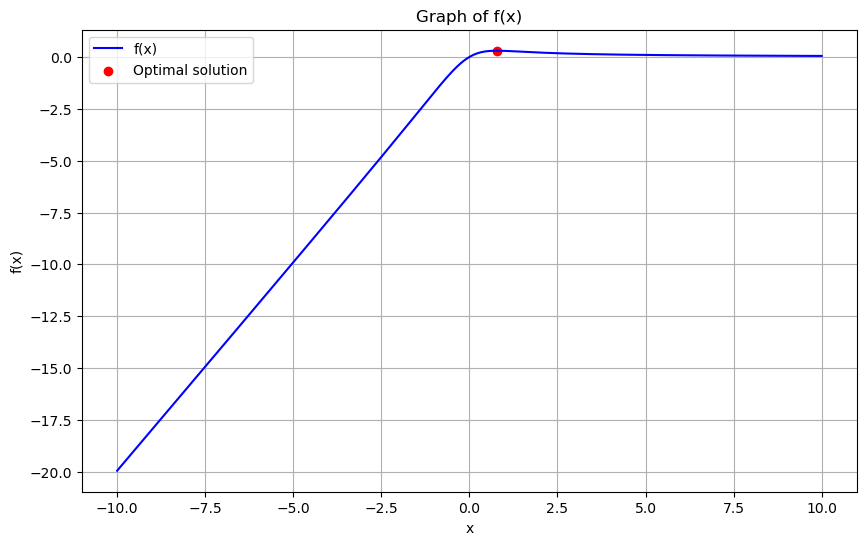

In [3]:
# Define the objective function
def f(x):
    return 0.5 / np.sqrt(1 + x**2) - np.sqrt(1 + x**2) * (1 - 0.5 / (1 + x**2)) + x

# Perform Quasi-Newton optimization
initial_guess = 0.6
epsilon = 0.01

x_values, f_values = quasi_newton(f, initial_guess, epsilon)

# Print the optimal solution
print("\nOptimal solution found at x = {:.5f}, f(x) = {:.5f}".format(x_values[-1], f_values[-1]))

# Generate x values
x_values = np.linspace(-10, 10, 400)
y_values = f(x_values)

# Find the optimal solution
optimal_solution_x = 0.78286
optimal_solution_y = f(optimal_solution_x)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)', color='b')
plt.scatter(optimal_solution_x, optimal_solution_y, color='red', label='Optimal solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.legend()
plt.grid(True)
plt.show()